In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

# Download historical stock prices (Apple)
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # Use only closing prices
df.dropna(inplace=True)

print(df.tail())

C:\Users\affan\AppData\Local\Temp\ipykernel_15572\311839917.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            AAPL
Date                  
2024-12-23  254.655716
2024-12-24  257.578674
2024-12-26  258.396667
2024-12-27  254.974930
2024-12-30  251.593079


In [5]:
pip install statsmodels pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 76.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow scikit-learn


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   -- ------------------------------------ 21.8/376.0 MB 114.3 MB/s eta 0:00:04
   ---- ---------------------------------- 43.5/376.0 MB 110.6 MB/s eta 0:00:04
   ------ -------------------------------- 66.8/376.0 MB 112.1 MB/s eta 0:00:03
   --------- ----------------------------- 87.8/376.0 MB 109.9 MB/s eta 0:00:03
   ----------- -------------------------- 110.6/376.0 MB 110.4 MB/s eta 0:00:03
   ------------- ------------------------ 132.1/376.0 MB 109.5 MB/s eta 0:00:03
   --------------- ---------------------- 155.2/376.0 MB 110.1 MB/s eta 0:00:03
   ----------------- -------------------- 176.9/376.0 MB 109.7 MB/s eta 0:00:02
   ------------------- ------------------ 195.3/376.0 MB 106.6 MB/s eta 0:00:02
   --------------------- ---------------- 217.3/376.0 MB 106.8 MB/s eta 0:00:02
   ------------------------ ------------- 240.9/376.0 MB 107.7 MB/s eta 0:00:02
   -------------------------- ----------- 264.8/3

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Prepare sequences
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict last 30 days
last_60 = scaled_data[-60:]
forecast_input = last_60.reshape(1, 60, 1)
predicted_prices = []

for _ in range(30):
    pred = model.predict(forecast_input)[0][0]
    predicted_prices.append(pred)
    last_60 = np.append(last_60[1:], [[pred]], axis=0)
    forecast_input = last_60.reshape(1, 60, 1)

# Inverse transform to get actual price scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))




Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0289
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.9993e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.9162e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5174e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.6281e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.5648e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.3473e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.9694e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.0498e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7710e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━

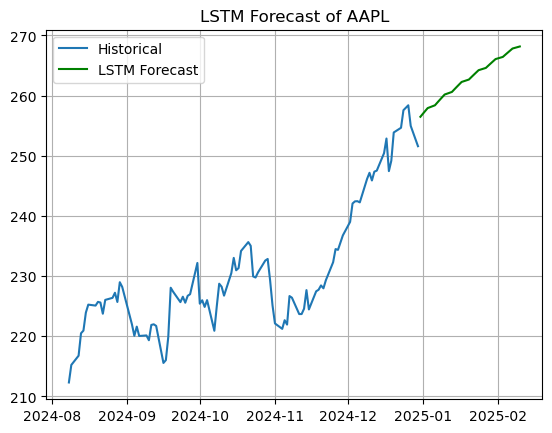

In [11]:
# Plot results
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(df.index[-100:], df['Close'].values[-100:], label='Historical')
future_index = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]  # skip today
plt.plot(future_index, predicted_prices, label='LSTM Forecast', color='green')
plt.title("LSTM Forecast of AAPL")
plt.legend()
plt.grid(True)
plt.show()